In [21]:
# import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold

In [22]:
np.random.seed(0) # for reproducibility

In [23]:
# dogs have higher ear flappiness index and lower whisker length
# "normal" means gaussian distribution
dogs_whisker_length = np.random.normal(loc=5, scale=1, size=10) # mean=5, std=1, n=10
dogs_ear_flappiness_index =  np.random.normal(loc=8, scale=1, size=10) # mean=8, std=1, n=10

In [24]:
cat_whisker_length = np.random.normal(loc=8, scale=1, size=10) # mean=8, std=1, n=10
cat_ear_flappiness_index =  np.random.normal(loc=5, scale=1, size=10) # mean=5, std=1, n=10

In [25]:
# Combine the data
dogs_data = np.vstack((dogs_whisker_length, dogs_ear_flappiness_index)).T
cats_data = np.vstack((cat_whisker_length, cat_ear_flappiness_index)).T
data = np.vstack((dogs_data, cats_data))
labels = np.hstack((np.zeros(len(dogs_data)), np.ones(len(cats_data)))) # 0 for dogs, 1 for cats

In [26]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

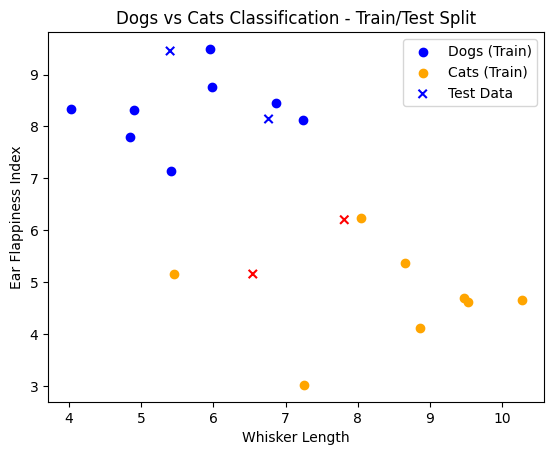

In [27]:
# Plotting the training and testing data
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], label='Dogs (Train)', color='blue', marker='o')
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], label='Cats (Train)', color='orange', marker='o')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='bwr', label='Test Data', marker='x')
plt.xlabel('Whisker Length')
plt.ylabel('Ear Flappiness Index')
plt.title('Dogs vs Cats Classification - Train/Test Split')
plt.legend()
plt.show()

In [28]:
# Implementing the random line classifier algorithm
def random_linear_classifier(data_dogs, data_cats, k, d):
    # d is the number features, i.e the dimension of the data (2 in this case)
    best_error = float('inf')
    best_theta = None
    best_theta0 = None

    for _ in range(k):
        theta = np.random.normal(size=d)
        theta0 = np.random.normal()

        error = compute_error(data_dogs, data_cats, theta, theta0)

        if error < best_error:
            best_error = error
            best_theta = theta
            best_theta0 = theta0
    
    return best_theta, best_theta0, best_error


def compute_error(data_dogs, data_cats, theta, theta0):
    error = 0

    for x_dog in data_dogs:
        if np.dot(theta, x_dog) + theta0 <= 0: # misclassified as cat
            error += 1

    for x_cat in data_cats:
        if np.dot(theta, x_cat) + theta0 > 0: # misclassified as dog
            error += 1
    
    return error

In [44]:
# Define function for k-fold cross-validation
def cross_validation(data_dogs, data_cats, k_values, d, n_splits=5):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    avg_errors = []

    for k in k_values:
        errors = []

        for train_index, val_index in kf.split(data_dogs):
            X_train_fold = np.vstack((data_dogs[train_index], data_cats[train_index]))
            y_train_fold = np.hstack((np.zeros(len(train_index)), np.ones(len(train_index))))
            X_val_fold = np.vstack((data_dogs[val_index], data_cats[val_index]))
            y_val_fold = np.hstack((np.zeros(len(val_index)), np.ones(len(val_index))))

            best_theta_fold, best_theta0_fold, error = random_linear_classifier(X_train_fold[y_train_fold == 0],
                                                                                X_train_fold[y_train_fold == 1],
                                                                                k, d)
            errors.append(compute_error(X_val_fold[y_val_fold == 0], X_val_fold[y_val_fold == 1],
                                        best_theta_fold, best_theta0_fold))
        avg_errors.append(np.mean(errors))

    best_k = k_values[np.argmin(avg_errors)]
    return best_k

# Define range of k values to test
k_values = [1, 10, 50, 100, 200, 250]

best_k = cross_validation(dogs_data, cats_data, k_values, d=2)

print(f"Best k from cross-validation: {best_k}")

Best k from cross-validation: 200


In [45]:
# Running the random line classifier
k = best_k # number of iterations
d = 2 # number of features

best_theta_train, best_theta0_train, train_error = random_linear_classifier(X_train[y_train == 0], X_train[y_train == 1], k, d)

In [46]:
# Plot the decision boundary
x_vals_train = np.linspace(2, 10, 100)
y_vals_train = (-best_theta_train[0] / best_theta_train[1]) * x_vals_train - (best_theta0_train / best_theta_train[1])

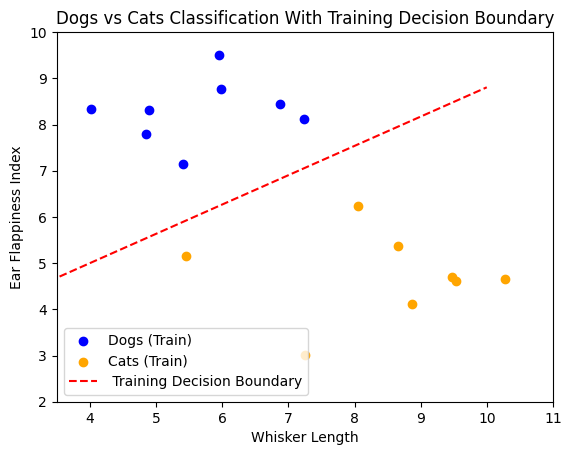

In [47]:
# Plotting the data
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], label='Dogs (Train)', color='blue', marker='o')
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], label='Cats (Train)', color='orange', marker='o')
plt.plot(x_vals_train, y_vals_train, color='red', linestyle='--', label=' Training Decision Boundary')
# Set limits for x and y axes
plt.xlim(3.5, 11)
plt.ylim(2, 10)
plt.xlabel('Whisker Length')
plt.ylabel('Ear Flappiness Index')
plt.title('Dogs vs Cats Classification With Training Decision Boundary')
plt.legend()
plt.show()

In [48]:
print(f"Training Error: {train_error} out of {len(X_train)}")

Training Error: 0 out of 16


In [49]:
# compute test error
test_error = compute_error(X_test[y_test == 0], X_test[y_test == 1], best_theta_train, best_theta0_train)
print(f"Test Error: {test_error} out of {len(X_test)}")

Test Error: 0 out of 4


In [50]:
# Plot the decision boundary
x_vals_test = np.linspace(2, 10, 100)
y_vals_test = (-best_theta_train[0] / best_theta_train[1]) * x_vals_test - (best_theta0_train / best_theta_train[1])

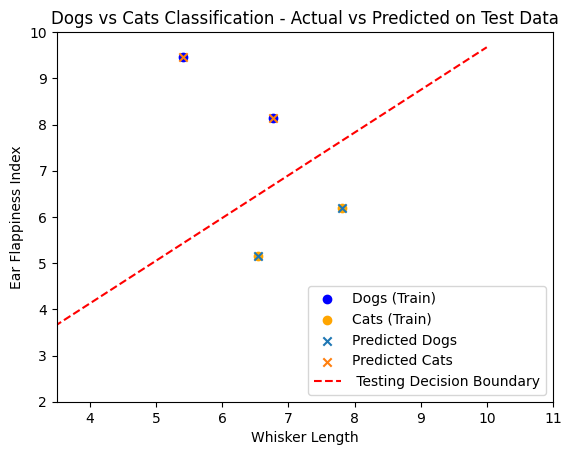

In [36]:
# Plotting the actual test data and predicted test data
plt.scatter(X_test[y_test == 0][:, 0], X_test[y_test == 0][:, 1], label='Dogs (Train)', color='blue', marker='o')
plt.scatter(X_test[y_test == 1][:, 0], X_test[y_test == 1][:, 1], label='Cats (Train)', color='orange', marker='o')

# Predict test data points using the learned decision boundary
predicted_labels = np.zeros_like(y_test)
for i, x_test in enumerate(X_test):
    if np.dot(best_theta_train, x_test) + best_theta0_train > 0:
        predicted_labels[i] = 1
    
# Plot the predicted test data points
plt.scatter(X_test[predicted_labels == 0][:,0], X_test[predicted_labels == 0][:,1], marker='x', label='Predicted Dogs')
plt.scatter(X_test[predicted_labels == 1][:,0], X_test[predicted_labels == 1][:,1], marker='x', label='Predicted Cats')

# Plot the decision boundary
plt.plot(x_vals_test, y_vals_test, color='red', linestyle='--', label=' Testing Decision Boundary')

# Set limits for x and y axes
plt.xlim(3.5, 11)
plt.ylim(2, 10)
plt.xlabel('Whisker Length')
plt.ylabel('Ear Flappiness Index')
plt.title('Dogs vs Cats Classification - Actual vs Predicted on Test Data')
plt.legend()
plt.show()